### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import folium

source - https://medium.com/analytics-vidhya/create-and-visualize-choropleth-map-with-folium-269d3fd12fa0

### Load the dataset

In [3]:
df = pd.read_csv("US_Accidents_Dec20_Updated.csv")

In [4]:
pd.set_option("max_columns",47)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


### Data Preparation and Cleaning

In [5]:
# Look at some Brief Information about the Data
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
#look at statistical info about the data
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [7]:
#Convert Time reference columns to datetime series
time = ["Start_Time","End_Time","Weather_Timestamp"]
for i in time:
    df[i] = pd.to_datetime(df[i])

In [8]:
# Select Columns which have "Object" dtype
object_col = df.columns[df.dtypes == "object"]
object_col

Index(['ID', 'Description', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [9]:
object_col = object_col.drop(['Description','Street',"Zipcode","Country"])
object_col

Index(['ID', 'Side', 'City', 'County', 'State', 'Timezone', 'Airport_Code',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [10]:
# Covert Object into category dtype for less memory usage 
for i in object_col:
    df[i] = df[i].astype("category")

In [11]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     category      
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   category      
 13  City                   category      
 14  County                 category      
 15  State                  category      
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [12]:
# Finding missing values
missing_values = df.isna().sum()
percentage = (missing_values/df.shape[0])*100

In [13]:
missing_percent = pd.DataFrame({"Number_of_missing_values":missing_values,"Percentage":percentage})
missing_percent.sort_values(by="Percentage",ascending = False)

,Number_of_missing_values,Percentage
Number,1891672,65.081728
Precipitation(in),1301326,44.771263
Wind_Chill(F),1183859,40.729888
Wind_Speed(mph),307163,10.567740
End_Lat,282821,9.730270
End_Lng,282821,9.730270
Visibility(mi),72078,2.479796
Weather_Condition,71851,2.471986
Humidity(%),71270,2.451997
Temperature(F),67224,2.312797


In [14]:
#getting correleation between columns 
df.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.061409,0.106505,0.065170,0.116482,0.127185,0.013217,-0.004717,-0.070314,0.027513,0.051001,-0.002381,0.056054,0.021830,-0.028065,-0.002865,-0.107441,-0.002779,0.038648,-0.005160,-0.014644,-0.002841,-0.035492,-0.036645,-0.001062,-0.132553,NaN
Start_Lat,0.061409,1.000000,-0.057526,0.999997,-0.072172,0.057408,0.080230,-0.440860,-0.499835,0.035010,-0.134030,-0.062562,0.041560,0.003323,0.031825,0.003306,-0.031684,-0.003049,0.025738,-0.002906,0.004134,-0.002750,-0.017003,0.011379,0.006753,-0.083863,NaN
Start_Lng,0.106505,-0.057526,1.000000,-0.072166,0.999999,0.049412,-0.191238,-0.038224,-0.108068,0.198742,0.166222,-0.026764,0.110717,0.034418,0.003542,-0.010299,0.024894,0.018225,-0.048710,-0.000771,-0.017568,0.000961,0.003074,-0.040513,-0.003766,0.089655,NaN
End_Lat,0.065170,0.999997,-0.072166,1.000000,-0.072163,0.051941,0.085967,-0.435116,-0.494490,0.030347,-0.137707,-0.061690,0.039390,0.000618,0.031587,0.002648,-0.034554,-0.001591,0.024574,-0.004371,0.003996,-0.002790,-0.018779,0.010632,0.006841,-0.084346,NaN
End_Lng,0.116482,-0.072172,0.999999,-0.072163,1.000000,0.027761,-0.193424,-0.029349,-0.092879,0.208813,0.175046,-0.025649,0.104306,0.033185,0.004203,-0.010295,0.022658,0.018372,-0.045961,-0.000798,-0.016283,0.000771,0.006269,-0.040374,-0.003801,0.089369,NaN
Distance(mi),0.127185,0.057408,0.049412,0.051941,0.027761,1.000000,0.058853,-0.049013,-0.049330,0.025472,-0.040414,-0.015581,0.007128,-0.001138,-0.020875,-0.000247,-0.058350,-0.003657,0.030381,-0.004755,-0.014928,-0.001535,-0.029193,-0.015332,-0.002351,-0.087949,NaN
Number,0.013217,0.080230,-0.191238,0.085967,-0.193424,0.058853,1.000000,-0.040136,-0.027098,0.011915,-0.055408,-0.011328,-0.001218,-0.004215,-0.036221,-0.002005,-0.057781,-0.001432,-0.006870,-0.006431,-0.013325,-0.001031,-0.027131,0.001025,-0.003668,-0.066206,NaN
Temperature(F),-0.004717,-0.440860,-0.038224,-0.435116,-0.029349,-0.049013,-0.040136,1.000000,0.993374,-0.344177,0.040501,0.178301,0.039756,-0.002132,0.000059,0.000566,0.046985,0.001017,-0.004080,0.006065,0.004247,0.001664,0.019343,-0.000636,-0.000263,0.071725,NaN
Wind_Chill(F),-0.070314,-0.499835,-0.108068,-0.494490,-0.092879,-0.049330,-0.027098,0.993374,1.000000,-0.326135,-0.040730,0.184073,-0.070357,-0.017757,-0.000235,0.002969,0.053980,-0.002627,-0.014960,0.006376,0.008743,0.002375,0.028465,0.004191,0.002085,0.068290,NaN
Humidity(%),0.027513,0.035010,0.198742,0.030347,0.208813,0.025472,0.011915,-0.344177,-0.326135,1.000000,0.126864,-0.368379,-0.155178,0.062372,-0.003343,-0.004941,-0.047296,0.002485,-0.004391,-0.009967,-0.000949,0.002046,-0.001737,-0.010428,-0.002441,-0.036911,NaN


In [15]:
#Dropping columns consists more then 40% missing values 
#Country is US in the whole dataset so we can drop it 
#Turning_Loop is False in the whole dataset so we can drop it 
df.drop(["Country","Number","Turning_Loop","End_Lat","End_Lng","Precipitation(in)","Wind_Chill(F)"],axis=1,inplace=True)

In [16]:
#droping rows consists more then 10 missing values 
row_drop = df[df.isna().sum(axis=1)>=10].index
df.drop(row_drop,axis=0,inplace=True)

In [17]:
float_missing = ["Wind_Speed(mph)","Visibility(mi)","Humidity(%)","Temperature(F)","Pressure(in)"]
category_missing = ["Weather_Condition","Wind_Direction","Airport_Code","Timezone","Zipcode","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight","City","Wind_Direction"]

In [18]:
#Fill missing values by mean in case of numerial columns
for i in float_missing:
    df[i].fillna(df[i].mean(),inplace=True)

In [19]:
#Fill missing values by mode in case of categorical columns
for i in category_missing:
    df[i].fillna(df[i].value_counts().index[0],inplace=True)

In [20]:
#Fill missing values of wheather_timestamp column by 0
df["Weather_Timestamp"].fillna(0,inplace=True)

In [21]:
df.isna().any()

ID                       False
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
Distance(mi)             False
Description              False
Street                   False
Side                     False
City                     False
County                   False
State                    False
Zipcode                  False
Timezone                 False
Airport_Code             False
Weather_Timestamp        False
Temperature(F)           False
Humidity(%)              False
Pressure(in)             False
Visibility(mi)           False
Wind_Direction           False
Wind_Speed(mph)          False
Weather_Condition        False
Amenity                  False
Bump                     False
Crossing                 False
Give_Way                 False
Junction                 False
No_Exit                  False
Railway                  False
Roundabout               False
Station 

### Exploratory Analyses and Visualization

In [22]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,US Highway 395 S,R,Carson City,Douglas,NV,89705,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,Clear,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,Day,Day,Day,Day


### At what Time do Accidents Occurs in Us

In [23]:
#Creating a new DataFrame with Star_Time Column
df2 = df[["Start_Time"]].copy()
df2

,Start_Time
0,2019-05-21 08:29:55
1,2019-10-07 17:43:09
2,2020-12-13 21:53:00
3,2018-04-17 16:51:23
4,2016-08-31 17:40:49
...,...
2906605,2018-06-28 08:49:01
2906606,2019-01-10 02:01:01
2906607,2020-11-23 12:52:00
2906608,2019-12-29 22:38:00


In [24]:
#Creating year,month,weekday,day and hour wise individual columns 
df2["Year"] = df["Start_Time"].dt.year
df2["Month"] = df["Start_Time"].dt.month
df2["Day"] = df["Start_Time"].dt.day
df2["WeekDay"] = df["Start_Time"].dt.weekday
df2["Hour"] = df["Start_Time"].dt.hour

In [25]:
df2

,Start_Time,Year,Month,Day,WeekDay,Hour
0,2019-05-21 08:29:55,2019,5,21,1,8
1,2019-10-07 17:43:09,2019,10,7,0,17
2,2020-12-13 21:53:00,2020,12,13,6,21
3,2018-04-17 16:51:23,2018,4,17,1,16
4,2016-08-31 17:40:49,2016,8,31,2,17
...,...,...,...,...,...,...
2906605,2018-06-28 08:49:01,2018,6,28,3,8
2906606,2019-01-10 02:01:01,2019,1,10,3,2
2906607,2020-11-23 12:52:00,2020,11,23,0,12
2906608,2019-12-29 22:38:00,2019,12,29,6,22


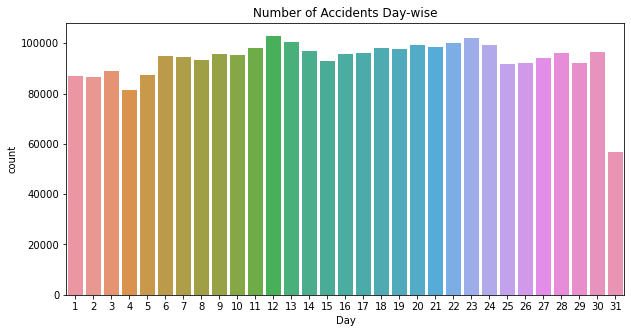

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=df2.Day)
plt.title("Number of Accidents Day-wise");

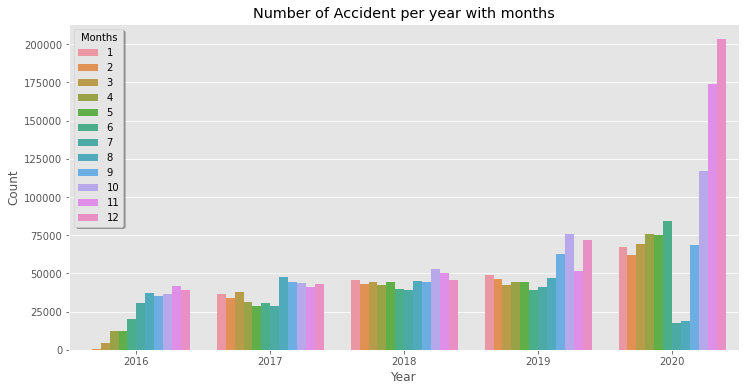

In [27]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
sns.countplot(x=df2.Year,hue=df2.Month)
plt.title("Number of Accident per year with months")
plt.ylabel("Count")
plt.legend(title = "Months",loc="upper left",shadow=True);

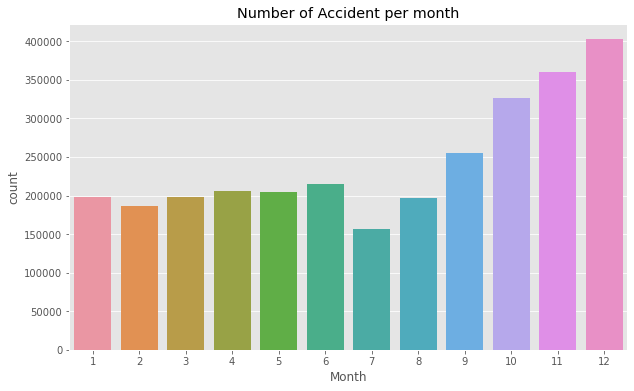

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x=df2.Month)
plt.title("Number of Accident per month");

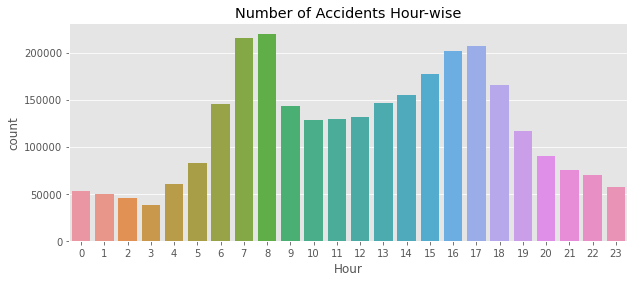

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x=df2.Hour)
plt.title("Number of Accidents Hour-wise");

In [30]:
df2.WeekDay.replace([0,1,2,3,4,5,6],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],inplace=True)

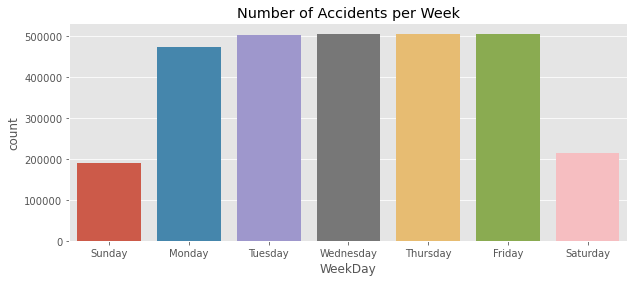

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(x=df2.WeekDay,order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
plt.title("Number of Accidents per Week");

### States that has highest number of accidents

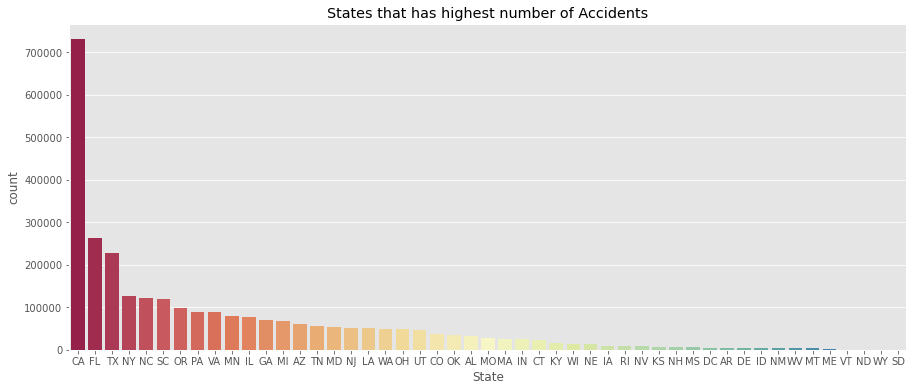

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x= df.State, order = df["State"].value_counts().index,palette="Spectral")
plt.title("States that has highest number of Accidents");

In [33]:
State_count = df.State.value_counts().to_frame().reset_index().rename(columns={"State":"Count","index":"State"})

In [34]:
States = ["California","Florida","Texas","New York","North Carolina","South Carolina","Oregon","Pennsylvania","Virginia",
           "Minnesota","Illinois","Georgia","Michigan","Arizona","Tennessee","Maryland","New Jersey","Louisiana","Washington",
          "Ohio","Utah","Colorado","Oklahoma","Alabama","Missouri","Massachusetts","Indiana","Connecticut","Kentucky",
         "Wisconsin","Nebraska","Iowa","Rhode Island","Nevada","Kansas","New Hampshire","Mississippi","District of Columbia",
         "Arkansas","Delaware","Idaho","New Mexico","West Virginia","Montana","Maine","Vermont","North Dakota","Wyoming",
         "South Dakota"]
full_state = pd.DataFrame(States)
full_state.rename(columns={0:"States"},inplace=True)

In [35]:
State_count = pd.concat([State_count,full_state],axis=1)

In [36]:
import json

In [37]:
#Create a plan world map
US_map = folium.Map([37.09024, -95.712891],zoom_start=4)
#geojson file
Us_geo = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
#generate choropleth map of accident
folium.Choropleth(
                 geo_data = Us_geo,
                name="choropleth",
                 data=State_count,
                 columns=["States","Count"],
                 key_on="feature.properties.name",
                 fill_color="YlOrRd",
                 legend_name = "Accidents in State").add_to(US_map)
US_map

### Location at which Maximum Accident Happened

In [38]:
lat_lng = df.groupby(["Start_Lat","Start_Lng"]).count()

In [39]:
lat_lng.Severity.nlargest(1)

Start_Lat  Start_Lng  
37.808498  -122.366852    329
Name: Severity, dtype: int64

In [40]:
# generate map of San_Francisco
San_Francisco = folium.Map(location = [37.808498 , -122.366852],zoom_start=12)
## add a marker to the location 

# create a feature group
Bridge = folium.map.FeatureGroup()
# style the feature group
Bridge.add_child(folium.features.CircleMarker([37.808498 , -122.366852],radius=5,color="red",fill_color="red"))

# add the feature group to the map
San_Francisco.add_child(Bridge)

# label the marker
folium.Marker([37.808498 , -122.366852],popup="San Francisco-Oakland Bay Brg E").add_to(San_Francisco)
San_Francisco

### Factors Affecting Accidents Severity

#### Accidents in Day & Night

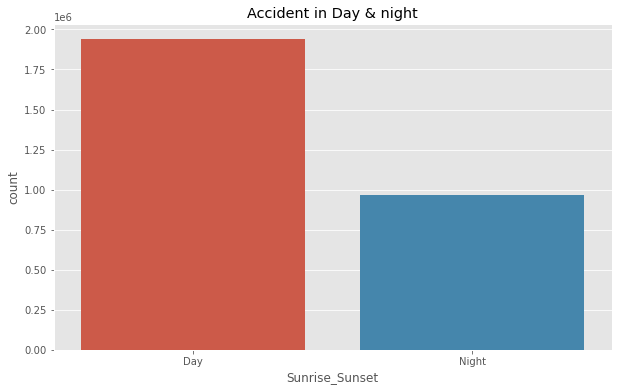

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.Sunrise_Sunset)
plt.title("Accident in Day & night");

#### Top 10 Temperatures(F) which causes Maximum Accidents

In [42]:
df["Temperature(F)"] = round(df["Temperature(F)"],2)
df["Temperature(F)"].value_counts().index[:25]

Float64Index([60.99,  68.0,  59.0,  77.0,  73.0,  63.0,  64.0,  72.0,  70.0,
               61.0,  75.0,  50.0,  57.0,  66.0,  54.0,  55.0,  79.0,  52.0,
               81.0,  82.0,  48.0,  46.0,  45.0,  86.0,  84.0],
             dtype='float64')

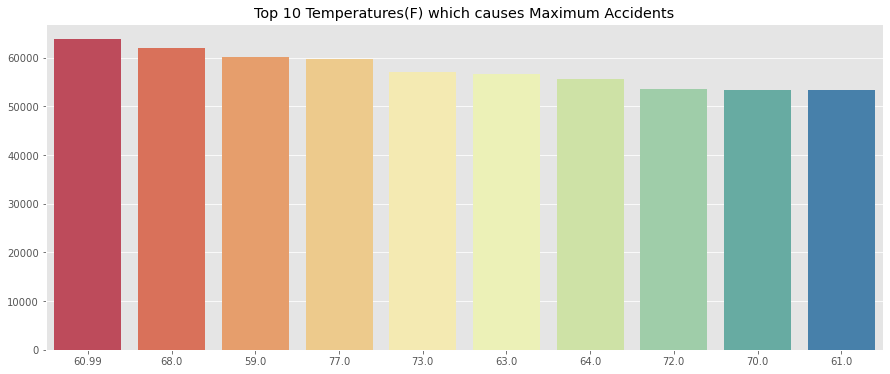

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["Temperature(F)"].value_counts().index[:10],y=df["Temperature(F)"].value_counts().values[:10],
           order=df["Temperature(F)"].value_counts().index[:10],palette="Spectral")
plt.title("Top 10 Temperatures(F) which causes Maximum Accidents");

- Maximum Accidents happened in 60-80F Temperature

#### Top 10 Temperatures(F) which causes Minimum Accidents

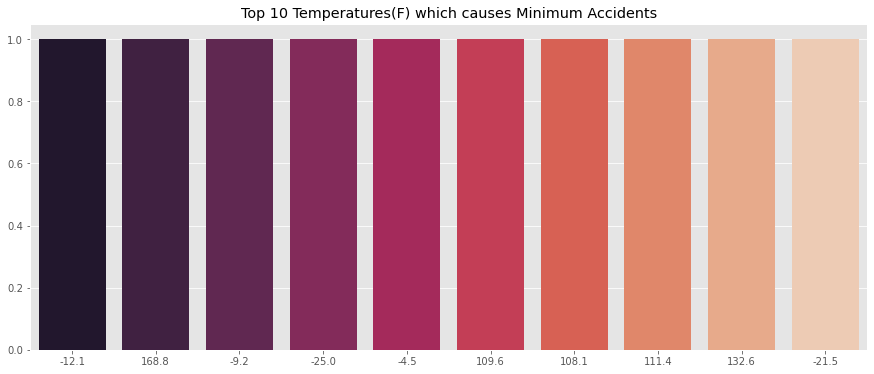

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["Temperature(F)"].value_counts(ascending=True).index[:10],y=df["Temperature(F)"].value_counts(ascending=True).values[:10],
           order=df["Temperature(F)"].value_counts(ascending=True).index[:10],palette="rocket")
plt.title("Top 10 Temperatures(F) which causes Minimum Accidents");

#### Accidents due to Whether Condition 

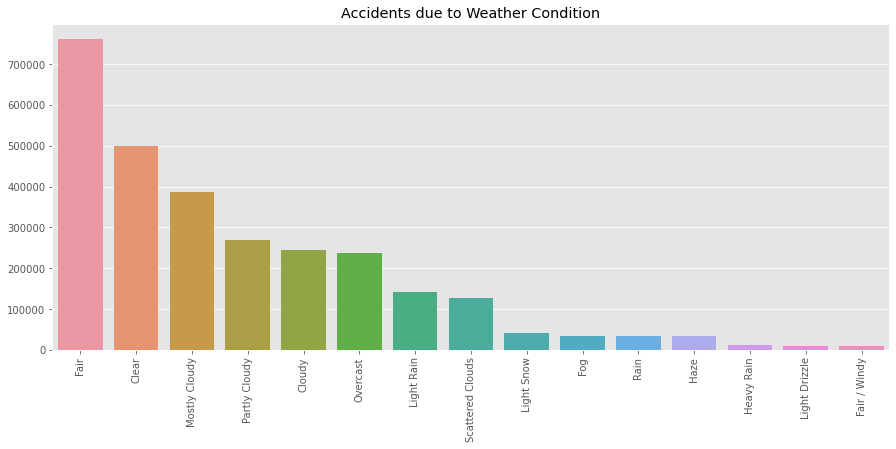

In [45]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["Weather_Condition"].value_counts().index[:15],y=df["Weather_Condition"].value_counts().values[:15],order=df["Weather_Condition"].value_counts().index[:15])
plt.xticks(rotation=90)
plt.title("Accidents due to Weather Condition");

- Maximum Accidents happened in Fair whether